# Tratamiento de variables categóricas

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
mainpath = '../../datasets/'
filename = 'ecom-expense/Ecom Expense.csv'
fullpath = os.path.join(mainpath, filename)

df = pd.read_csv(fullpath)

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df['Gender'], prefix = 'Gender')
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix = 'City')

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [9]:
df_new = df_new[column_names].join(dummy_city_tier)

In [10]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [11]:
feature_cols = ['Monthly Income', 'Transaction Time',
                'Gender_Female', 'Gender_Male',
                'City_Tier 1', 'City_Tier 2','City_Tier 3',
                'Record']

In [12]:
X = df_new[feature_cols]
Y = df_new['Total Spend']

In [13]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [14]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030136816
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [15]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Female', -131.0250132555454),
 ('Gender_Male', 131.02501325554525),
 ('City_Tier 1', 76.76432601049507),
 ('City_Tier 2', 55.138974309232566),
 ('City_Tier 3', -131.90330031972772),
 ('Record', 772.2334457445634)]

In [16]:
lm.score(X, Y)

0.9179923586131016

In [17]:
-79.41713030137362 -131.0250132555464-131.90330031972763

-342.34544387664766

El modelo puede ser escrito como:
```    
Total_Spend = -79.41713030137362 + 'Monthly Income' * 0.1475389804920574
                                 + 'Transaction Time' * 0.15494612549589615
                                 + 'Gender_Female' * -131.0250132555464
                                 + 'Gender_Male' * 131.02501325554636
                                 + 'City_Tier 1' * 76.76432601049565
                                 + 'City_Tier 2' * 55.13897430923203
                                 + 'City_Tier 3' * -131.90330031972763
                                 + 'Record' * 772.2334457445646
```
* Si es hombre y vive CT1:
```    
Total_Spend = 128.3722089646684 + 'Monthly Income' * 0.1475389804920574
                                + 'Transaction Time' * 0.15494612549589615
                                + 'Record' * 772.2334457445646
```
* Si es hombre y vive en CT2:
```    
Total_Spend = 106.74685726340476 + 'Monthly Income' * 0.1475389804920574
                                 + 'Transaction Time' * 0.15494612549589615
                                 + 'Record' * 772.2334457445646
```
* Si es hombre y vive en CT3:
```    
Total_Spend = -80.2954173655549 + 'Monthly Income' * 0.1475389804920574
                                + 'Transaction Time' * 0.15494612549589615
                                + 'Record' * 772.2334457445646
```
* Si es mujer y vive CT1:
```    
Total_Spend = -133.67781754642436 + 'Monthly Income' * 0.1475389804920574
                                  + 'Transaction Time' * 0.15494612549589615
                                  + 'Record' * 772.2334457445646
```
* Si es mujer y vive CT2:
```    
Total_Spend = -155.303169247688 + 'Monthly Income' * 0.1475389804920574
                                + 'Transaction Time' * 0.15494612549589615
                                + 'Record' * 772.2334457445646
```
* Si es mujer y vive CT3:
```    
Total_Spend = -342.34544387664766 + 'Monthly Income' * 0.1475389804920574
                                  + 'Transaction Time' * 0.15494612549589615
                                  + 'Record' * 772.2334457445646
```

In [18]:
df_new['prediction'] = -79.41713030137362 + df_new['Monthly Income'] * 0.1475389804920574 + df_new['Transaction Time'] * 0.15494612549589615 + df_new['Gender_Female'] * -131.0250132555464 + df_new['Gender_Male'] * 131.02501325554636 + df_new['City_Tier 1'] * 76.76432601049565 + df_new['City_Tier 2'] * 55.13897430923203 + df_new['City_Tier 3'] * -131.90330031972763 + df_new['Record'] * 772.2334457445646

In [19]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [20]:
SSD = np.sum((df_new['prediction'] - df_new['Total Spend'])**2)
SSD

1517733985.3408165

In [21]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)- 1))
RSE

803.1318809818166

In [22]:
sales_mean = np.mean(df_new['Total Spend'])
sales_mean

6163.176415976715

In [23]:
error = RSE/sales_mean
error

0.1303113568029416

In [24]:
# Forma rápida de hacer el cálculo de las predicciones usando la función predict
df_new["prediction2"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [25]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction,prediction2
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335,3581.980335


# Eliminar variables dummy redundantes

In [26]:
dummy_gender = pd.get_dummies(df['Gender'], prefix = 'Gender').iloc[:, 1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [27]:
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix = 'City').iloc[:, 1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [28]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [29]:
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Male', 'City_Tier 2', 'City_Tier 3', 'Record']
X = df_new[feature_cols]
Y = df_new['Total Spend']
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [30]:
lm.intercept_

-133.67781754642238

In [31]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Male', 262.0500265110957),
 ('City_Tier 2', -21.62535170126307),
 ('City_Tier 3', -208.66762633022307),
 ('Record', 772.2334457445637)]

In [32]:
lm.score(X, Y)

0.9179923586131016

Coeficientes con todas las variables del modelo:
```
('Monthly Income', 0.1475389804920574),
('Transaction Time', 0.15494612549589615),
('Gender_Female', -131.0250132555464),
('Gender_Male', 131.02501325554636),
('City_Tier 1', 76.76432601049565),
('City_Tier 2', 55.13897430923203),
('City_Tier 3', -131.90330031972763),
('Record', 772.2334457445646)
```
Coeficientes tras enmascarar las variables dummy pertinentes:
```
('Monthly Income', 0.14753898049205744),
('Transaction Time', 0.1549461254958966),
('Gender_Male', 262.0500265110955),
('City_Tier 2', -21.62535170126276),
('City_Tier 3', -208.66762633022324),
('Record', 772.2334457445636)
```

Los cambios se reflejan en:
* Gender_Male:
    * Antes -> 131.02
    * Después -> 262.05 = (131.02 - (-131.02))
* Gender_Female:
    * Antes -> -131.02
    * Después -> 0
* CT1: 
    * Antes -> 76.76
    * Después -> 0
* CT2:
    * Antes -> 55.13
    * Después -> -21.62 = (55.13 - 76.76)
* CT3:
    * Antes -> -131.90
    * Después -> -208.66 = (-131.90 -76.76)

# Transformación de variables para conseguir una relación no lineal

In [33]:
mainpath = '../../datasets/'
filename = 'auto/auto-mpg.csv'
fullpath = os.path.join(mainpath, filename)

data_auto = pd.read_csv(fullpath)

In [34]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [35]:
data_auto.shape

(406, 9)

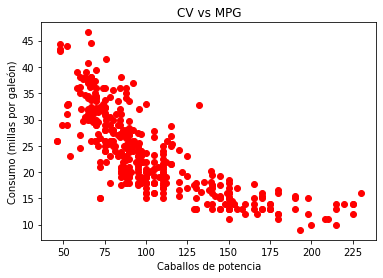

In [36]:
data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto['horsepower'] = data_auto['horsepower'].dropna()
plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')
plt.xlabel('Caballos de potencia')
plt.ylabel('Consumo (millas por galeón)')
plt.title('CV vs MPG')
plt.show()

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [37]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean()).values.reshape(-1, 1)
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

In [38]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

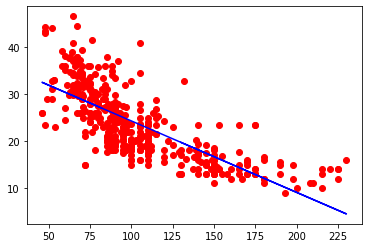

In [39]:
plt.plot(X, Y, 'ro')
plt.plot(X, lm.predict(X), color = 'blue')
plt.show()

In [40]:
lm.score(X, Y) # Factor R^2

0.5746533406450252

In [41]:
SSD = np.sum((Y - lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X) - 1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error

(10315.751960060918,
 5.046879480825511,
 23.514572864321607,
 0.21462773361633472)

## Modelo de regresión cuadrático
* mpg = a + b * horsepower^2

In [42]:
X = X**2 # Única modificación

In [43]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [44]:
lm.score(X, Y) # Factor R^2

0.4849887034823205

In [45]:
SSD = np.sum((Y - lm.predict(X))**2)
RSE = np.sqrt(SSD/(len(X) - 1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error

(12490.350340501926,
 5.553410772769817,
 23.514572864321607,
 0.23616889852998113)

## Modelo de regresión lineal y cuadrático
* mpg = a + b * horsepower + c * horsepower^2

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [47]:
poly = PolynomialFeatures(degree = 2)

In [48]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean()).values.reshape(-1, 1)
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

In [49]:
X_data = poly.fit_transform(X)

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X_data, Y)

LinearRegression()

In [52]:
lm.score(X_data, Y)

0.6439066584257469

Aumenta el R2 al añadir un modelo de regresión lineal junto a uno cuadrático

In [53]:
lm.intercept_

55.026192447081144

In [54]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026192447081144 - 0.43404318 * hp + 0.00112615 * hp^2

In [55]:
def regression_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X) - 1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print('SSD: {}, RSE: {}, y_mean: {}, error: {}\n'.format(SSD, RSE, y_mean, error))

In [56]:
# Probar con un bucle for distintos grados del polinomio, de grado 2 a grado 12
for d in range (2, 13):
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(X)
    lm = LinearRegression()
    lm.fit(X_data, Y)
    print('Regresión de grado {}'.format(d))
    print('R2:', lm.score(X_data, Y))
    print('Intercept:', lm.intercept_)
    print('Coeficientes:', lm.coef_)
    regression_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
R2: 0.6439066584257469
Intercept: 55.026192447081144
Coeficientes: [ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, y_mean: 23.514572864321607, error: 0.196379546619069

Regresión de grado 3
R2: 0.6444678885560744
Intercept: 58.448774111485776
Coeficientes: [ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, y_mean: 23.514572864321607, error: 0.19622473106036686

Regresión de grado 4
R2: 0.6467674189704502
Intercept: 40.096643862778855
Coeficientes: [ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491353, RSE: 4.5991947315797574, y_mean: 23.514572864321607, error: 0.1955891250126879

Regresión de grado 5
R2: 0.6547512491363356
Intercept: -40.694029037178964
Coeficientes: [ 0.00000000e+00  4.00021893e+00 -7.54802467e-02  6.19621640e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.171388794579, RSE: 4.546921734127706, y_mea

El que mejor resultados da es el de grado 2

# El problema de los outliers

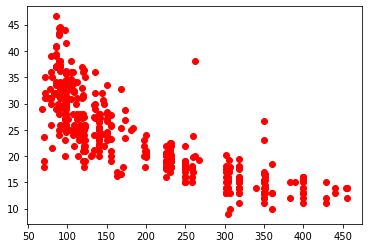

In [57]:
plt.plot(data_auto['displacement'], data_auto['mpg'], 'ro')
plt.show()

In [58]:
X = data_auto['displacement'].fillna(data_auto['displacement'].mean()).values.reshape(-1, 1)
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [59]:
lm.score(X, Y)

0.6261049762826918

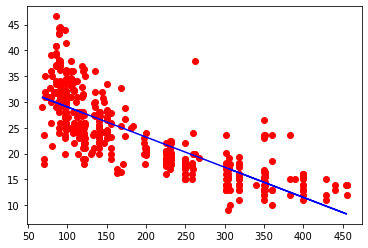

In [60]:
plt.plot(X, Y, 'ro')
plt.plot(X, lm.predict(X), color = 'blue')
plt.show()

In [61]:
data_auto[(data_auto['displacement'] > 250) & (data_auto['mpg'] > 35)] # Buscando el outlier

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [62]:
data_auto[(data_auto['displacement'] > 300) & (data_auto['mpg'] > 20)] # Buscando el outlier

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [63]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [64]:
X = data_auto_clean['displacement'].fillna(data_auto['displacement'].mean()).values.reshape(-1, 1)
Y = data_auto_clean['mpg'].fillna(data_auto['mpg'].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [65]:
lm.score(X, Y)

0.646556489442804

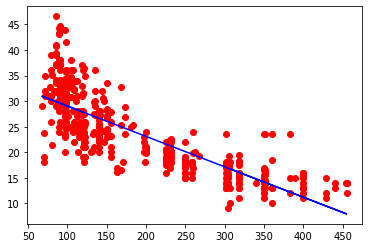

In [66]:
plt.plot(X, Y, 'ro')
plt.plot(X, lm.predict(X), color = 'blue')
plt.show()